In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import kagglehub
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.


# Task
Build a U-Net image segmentation model for pneumonia detection using the "chest-xray-pneumonia" dataset located at "/kaggle/input/chest-xray-pneumonia". This will involve exploring the dataset, defining the U-Net architecture, preparing conceptual/dummy data and masks for training, compiling the model, and demonstrating an inference pass.

## Explore Dataset

### Subtask:
Inspect the structure of the `chest-xray-pneumonia` dataset to understand its contents and confirm the absence of segmentation masks. This will help clarify the data available for the model.


**Reasoning**:
To begin exploring the dataset structure as instructed, I will list the contents of the `path` directory using `os.listdir()` to see the main folders and files. This will provide an initial overview of the dataset organization.



In [ ]:
import os

# List the contents of the dataset directory
dataset_contents = os.listdir(path)
print(f"Contents of the dataset directory '{path}':\n{dataset_contents}")

Contents of the dataset directory '/kaggle/input/chest-xray-pneumonia':
['chest_xray']


**Reasoning**:
The previous step showed that the dataset contains a single directory 'chest_xray'. To follow the instructions and navigate into subdirectories, I will now list the contents of the 'chest_xray' directory to see its internal structure.



In [ ]:
chest_xray_path = os.path.join(path, dataset_contents[0])
chest_xray_contents = os.listdir(chest_xray_path)
print(f"Contents of '{chest_xray_path}':\n{chest_xray_contents}")

Contents of '/kaggle/input/chest-xray-pneumonia/chest_xray':
['chest_xray', '__MACOSX', 'val', 'test', 'train']


**Reasoning**:
The previous step identified 'train', 'test', and 'val' as key subdirectories. To continue inspecting the dataset structure and look for segmentation masks, I will now explore the 'train' subdirectory by listing its contents.



In [ ]:
train_path = os.path.join(chest_xray_path, 'train')
train_contents = os.listdir(train_path)
print(f"Contents of '{train_path}':\n{train_contents}")

Contents of '/kaggle/input/chest-xray-pneumonia/chest_xray/train':
['PNEUMONIA', 'NORMAL']


**Reasoning**:
The 'train' directory contains 'PNEUMONIA' and 'NORMAL' subdirectories. To inspect the image files and confirm the absence of segmentation masks, I will now list the contents of the 'PNEUMONIA' subdirectory within the 'train' folder.



In [ ]:
pneumonia_path = os.path.join(train_path, 'PNEUMONIA')
pneumonia_contents = os.listdir(pneumonia_path)
print(f"First 5 contents of '{pneumonia_path}':\n{pneumonia_contents[:5]}")
print(f"Total files in '{pneumonia_path}': {len(pneumonia_contents)}")

First 5 contents of '/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA':
['person1180_virus_2010.jpeg', 'person1230_virus_2081.jpeg', 'person1513_virus_2632.jpeg', 'person124_virus_238.jpeg', 'person746_virus_1369.jpeg']
Total files in '/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA': 3875


In [ ]:
prediction = model.predict(dummy_image)

print(f"Shape of the prediction (segmentation map): {prediction.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Shape of the prediction (segmentation map): (1, 256, 256, 1)


**Reasoning**:
The previous step examined the 'PNEUMONIA' subdirectory. To complete the inspection of the 'train' directory and further confirm the absence of segmentation masks, I will now list the contents of the 'NORMAL' subdirectory.



In [ ]:
normal_path = os.path.join(train_path, 'NORMAL')
normal_contents = os.listdir(normal_path)
print(f"First 5 contents of '{normal_path}':\n{normal_contents[:5]}")
print(f"Total files in '{normal_path}': {len(normal_contents)}")

First 5 contents of '/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL':
['NORMAL2-IM-0771-0001.jpeg', 'NORMAL2-IM-1294-0001-0002.jpeg', 'IM-0675-0001.jpeg', 'NORMAL2-IM-1169-0001.jpeg', 'IM-0421-0001.jpeg']
Total files in '/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL': 1341


**Reasoning**:
Having explored the 'train' subdirectory, I will now inspect the 'test' subdirectory to complete the dataset structure inspection and verify the absence of segmentation masks across all main partitions.



In [ ]:
test_path = os.path.join(chest_xray_path, 'test')
test_contents = os.listdir(test_path)
print(f"Contents of '{test_path}':\n{test_contents}")

Contents of '/kaggle/input/chest-xray-pneumonia/chest_xray/test':
['PNEUMONIA', 'NORMAL']


**Reasoning**:
Following the inspection of the 'test' directory, I will now inspect the contents of the 'PNEUMONIA' subdirectory within 'test' to confirm its structure and the absence of segmentation masks.



In [ ]:
test_pneumonia_path = os.path.join(test_path, 'PNEUMONIA')
test_pneumonia_contents = os.listdir(test_pneumonia_path)
print(f"First 5 contents of '{test_pneumonia_path}':\n{test_pneumonia_contents[:5]}")
print(f"Total files in '{test_pneumonia_path}': {len(test_pneumonia_contents)}")

First 5 contents of '/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA':
['person1676_virus_2892.jpeg', 'person1650_virus_2852.jpeg', 'person22_virus_55.jpeg', 'person122_bacteria_582.jpeg', 'person85_bacteria_417.jpeg']
Total files in '/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA': 390


**Reasoning**:
Following the inspection of the 'PNEUMONIA' subdirectory within 'test', I will now inspect the 'NORMAL' subdirectory within 'test' to complete the examination of the 'test' partition and further confirm the absence of segmentation masks.



In [ ]:
test_normal_path = os.path.join(test_path, 'NORMAL')
test_normal_contents = os.listdir(test_normal_path)
print(f"First 5 contents of '{test_normal_path}':\n{test_normal_contents[:5]}")
print(f"Total files in '{test_normal_path}': {len(test_normal_contents)}")

First 5 contents of '/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL':
['NORMAL2-IM-0336-0001.jpeg', 'IM-0101-0001.jpeg', 'NORMAL2-IM-0337-0001.jpeg', 'NORMAL2-IM-0198-0001.jpeg', 'IM-0013-0001.jpeg']
Total files in '/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL': 234


**Reasoning**:
Having inspected the 'train' and 'test' subdirectories, I will now inspect the 'val' subdirectory to complete the dataset structure inspection and verify the absence of segmentation masks across all main partitions.



In [ ]:
val_path = os.path.join(chest_xray_path, 'val')
val_contents = os.listdir(val_path)
print(f"Contents of '{val_path}':\n{val_contents}")

Contents of '/kaggle/input/chest-xray-pneumonia/chest_xray/val':
['PNEUMONIA', 'NORMAL']


**Reasoning**:
Following the inspection of the 'val' directory, I will now inspect the contents of the 'PNEUMONIA' subdirectory within 'val' to confirm its structure and the absence of segmentation masks.



In [ ]:
val_pneumonia_path = os.path.join(val_path, 'PNEUMONIA')
val_pneumonia_contents = os.listdir(val_pneumonia_path)
print(f"First 5 contents of '{val_pneumonia_path}':\n{val_pneumonia_contents[:5]}")
print(f"Total files in '{val_pneumonia_path}': {len(val_pneumonia_contents)}")

First 5 contents of '/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA':
['person1947_bacteria_4876.jpeg', 'person1946_bacteria_4875.jpeg', 'person1952_bacteria_4883.jpeg', 'person1954_bacteria_4886.jpeg', 'person1951_bacteria_4882.jpeg']
Total files in '/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA': 8


**Reasoning**:
To complete the inspection of the 'val' directory and further confirm the absence of segmentation masks, I will now inspect the 'NORMAL' subdirectory within 'val'.



In [ ]:
val_normal_path = os.path.join(val_path, 'NORMAL')
val_normal_contents = os.listdir(val_normal_path)
print(f"First 5 contents of '{val_normal_path}':\n{val_normal_contents[:5]}")
print(f"Total files in '{val_normal_path}': {len(val_normal_contents)}")

First 5 contents of '/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL':
['NORMAL2-IM-1431-0001.jpeg', 'NORMAL2-IM-1440-0001.jpeg', 'NORMAL2-IM-1442-0001.jpeg', 'NORMAL2-IM-1427-0001.jpeg', 'NORMAL2-IM-1430-0001.jpeg']
Total files in '/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL': 8


## Define U-Net Model

### Subtask:
Implement a U-Net architecture using TensorFlow/Keras, which is a widely used and effective CNN for image segmentation tasks. This will serve as the core segmentation model.


**Reasoning**:
As the first step in implementing the U-Net architecture, I will import all the necessary layers and models from TensorFlow and Keras. This ensures that all required components are available for defining the encoder, decoder, and the overall U-Net model.



In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model

print("TensorFlow and Keras layers imported successfully.")

TensorFlow and Keras layers imported successfully.


**Reasoning**:
Following the import of necessary layers, I will now define the `encoder_block` function as specified in the instructions. This function will create the downsampling path of the U-Net by applying two convolutional layers and a max pooling layer, returning both the pooled output and the output before pooling for skip connections.



In [ ]:
def encoder_block(inputs, filters):
    # First convolutional layer
    conv = Conv2D(filters, (3, 3), activation='relu', padding='same')(inputs)
    # Second convolutional layer
    conv = Conv2D(filters, (3, 3), activation='relu', padding='same')(conv)
    # Max pooling layer for downsampling
    pool = MaxPooling2D(pool_size=(2, 2))(conv)
    return conv, pool

print("encoder_block function defined.")

encoder_block function defined.


**Reasoning**:
Following the definition of the `encoder_block` function, I will now define the `decoder_block` function, which is responsible for the upsampling path of the U-Net. This function will perform a `Conv2DTranspose` for upsampling, concatenate with the skip connection from the encoder, and then apply two `Conv2D` layers.



In [ ]:
def decoder_block(inputs, skip_features, filters):
    # Transposed convolutional layer for upsampling
    up = Conv2DTranspose(filters, (2, 2), strides=(2, 2), padding='same')(inputs)
    # Concatenate with the skip connection features from the encoder
    up = concatenate([up, skip_features])
    # First convolutional layer
    conv = Conv2D(filters, (3, 3), activation='relu', padding='same')(up)
    # Second convolutional layer
    conv = Conv2D(filters, (3, 3), activation='relu', padding='same')(conv)
    return conv

print("decoder_block function defined.")

decoder_block function defined.


**Reasoning**:
Now that the `encoder_block` and `decoder_block` functions are defined, I will combine them to construct the full U-Net model as specified. This involves defining an input layer, building the encoder path, creating a bottleneck, building the decoder path with skip connections, and concluding with an output convolutional layer.



In [ ]:
def unet_model(input_size=(256, 256, 1)):
    inputs = Input(input_size)

    # Encoder path (Downsampling)
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    # Bottleneck
    bottleneck = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    bottleneck = Conv2D(1024, (3, 3), activation='relu', padding='same')(bottleneck)

    # Decoder path (Upsampling with skip connections)
    d1 = decoder_block(bottleneck, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    # Output layer
    outputs = Conv2D(1, (1, 1), activation='sigmoid', padding='same')(d4)

    model = Model(inputs, outputs, name='U-Net')
    return model

# Create an instance of the model to demonstrate its structure
model = unet_model()
model.summary()
print("U-Net model defined and summarized.")

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_57 (Conv2D)  │ (None, 256, 256,  │        640 │ input_layer_3[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_58 (Conv2D)  │ (None, 256, 256,  │     36,928 │ conv2d_57[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 128, 128,  │          0 │ conv2d_58[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_59 (Conv2D)  │ (None, 128, 128,  │     73,856 │ max_pooling2d_12… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_60 (Conv2D)  │ (None, 128, 128,  │    147,584 │ conv2d_59[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 64, 64,    │          0 │ conv2d_60[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_61 (Conv2D)  │ (None, 64, 64,    │    295,168 │ max_pooling2d_13… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_62 (Conv2D)  │ (None, 64, 64,    │    590,080 │ conv2d_61[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 32, 32,    │          0 │ conv2d_62[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_63 (Conv2D)  │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_14… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_64 (Conv2D)  │ (None, 32, 32,    │  2,359,808 │ conv2d_63[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_15    │ (None, 16, 16,    │          0 │ conv2d_64[0][0]   │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_65 (Conv2D)  │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_15… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_66 (Conv2D)  │ (None, 16, 16,    │  9,438,208 │ conv2d_65[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_12 │ (None, 32, 32,    │  2,097,664 │ conv2d_66[0][0]   │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_12      │ (None, 32, 32,    │          0 │ conv2d_transpose

 Total params: 31,030,593 (118.37 MB)

 Trainable params: 31,030,593 (118.37 MB)

 Non-trainable params: 0 (0.00 B)

U-Net model defined and summarized.


## Prepare Data (Conceptual/Dummy)

### Subtask:
Outline how image data from the provided dataset would be loaded and preprocessed. Since explicit segmentation masks are not available in the dataset, I will generate placeholder/dummy masks to demonstrate the expected input format for a segmentation model during conceptual setup or a minimal forward pass.


**Reasoning**:
As instructed, I will load a sample image, preprocess it by resizing, converting to grayscale, and normalizing, then expand its dimensions. Concurrently, I will create a dummy mask with matching dimensions filled with zeros, and finally print the shapes of both to verify they are ready for the U-Net model.



In [ ]:
import numpy as np

# 1. Select a sample image path
sample_image_filename = pneumonia_contents[0]
sample_image_path = os.path.join(pneumonia_path, sample_image_filename)
print(f"Selected sample image: {sample_image_path}")

# 2. Load the selected image, convert to grayscale, and cast to tf.float32
image_raw = tf.io.read_file(sample_image_path)
image = tf.image.decode_jpeg(image_raw, channels=1) # Decode as grayscale
image = tf.cast(image, tf.float32)

# 3. Preprocess the image by resizing and normalizing
IMG_HEIGHT = 256
IMG_WIDTH = 256
image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
image = image / 255.0 # Normalize to [0, 1]

# 4. Expand the dimensions of the preprocessed image for batch and channel
# Resulting shape: (1, IMG_HEIGHT, IMG_WIDTH, 1)
dummy_image = tf.expand_dims(image, axis=0)

# 5. Create a dummy mask of the same spatial dimensions and type
# Resulting shape: (1, IMG_HEIGHT, IMG_WIDTH, 1)
dummy_mask = tf.zeros((1, IMG_HEIGHT, IMG_WIDTH, 1), dtype=tf.float32)

# 6. Print the shapes of the prepared dummy image and dummy mask
print(f"Shape of dummy image: {dummy_image.shape}")
print(f"Shape of dummy mask: {dummy_mask.shape}")

Selected sample image: /kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1180_virus_2010.jpeg
Shape of dummy image: (1, 256, 256, 1)
Shape of dummy mask: (1, 256, 256, 1)


## Compile Model

### Subtask:
Show how to compile the U-Net model with appropriate loss functions (e.g., Binary Cross-Entropy or Dice Loss) and metrics (e.g., IoU, Dice Coefficient) suitable for image segmentation.


**Reasoning**:
As the first instruction for compiling the model, I will define a custom Dice Coefficient metric function. This function will calculate the intersection and sum of the true and predicted masks to compute the Dice score, which is a common metric for image segmentation.



In [ ]:
import tensorflow.keras.backend as K

def dice_coefficient(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + K.epsilon()) / (K.sum(y_true_f) + K.sum(y_pred_f) + K.epsilon())

print("Dice Coefficient metric function defined.")

Dice Coefficient metric function defined.


**Reasoning**:
Following the definition of the custom Dice Coefficient metric, I will now compile the U-Net model as instructed. This involves specifying the Adam optimizer, 'binary_crossentropy' as the loss function, and including 'accuracy', `tf.keras.metrics.MeanIoU(num_classes=2)`, and the custom `dice_coefficient` as metrics.



In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.MeanIoU(num_classes=2), dice_coefficient])

print("U-Net model compiled successfully with Adam optimizer, binary cross-entropy loss, accuracy, MeanIoU, and Dice Coefficient metrics.")

U-Net model compiled successfully with Adam optimizer, binary cross-entropy loss, accuracy, MeanIoU, and Dice Coefficient metrics.


## Illustrate Inference

### Subtask:
Demonstrate how an image from the dataset can be passed through the untrained segmentation model to get a prediction (a segmentation map), showing the model's output structure.


## Summary:

### Data Analysis Key Findings

*   The `chest-xray-pneumonia` dataset is structured into `train`, `test`, and `val` sets, each containing `NORMAL` and `PNEUMONIA` subdirectories with image files.
*   The dataset **does not contain explicit segmentation masks**, meaning it is primarily set up for image classification rather than segmentation.
*   A U-Net model architecture was successfully defined using TensorFlow/Keras, featuring an encoder-decoder structure with skip connections and a sigmoid activation in the output layer, resulting in 31,030,593 trainable parameters.
*   Dummy image data was successfully preprocessed by resizing to (256, 256), normalizing to [0, 1], and expanding dimensions to a batch shape of (1, 256, 256, 1). A corresponding dummy mask with the same shape was created as a placeholder.
*   The U-Net model was compiled using the Adam optimizer, 'binary\_crossentropy' as the loss function, and metrics including 'accuracy', `tf.keras.metrics.MeanIoU(num_classes=2)`, and a custom-defined `dice_coefficient`.

### Insights or Next Steps

*   Since the dataset lacks actual segmentation masks, the next logical step would be to acquire or generate ground-truth segmentation masks for pneumonia regions to enable actual training of the U-Net for its intended purpose.
*   Proceed with demonstrating an inference pass using the defined and compiled (though untrained) U-Net model with the prepared dummy data to show its output structure, as per the remaining task requirements.


# Task
**Reasoning:**
The model has already performed an inference pass with a dummy image and mask. The next logical step, as per the plan, is to visualize the original dummy image, the dummy ground truth mask, and the predicted segmentation mask to conceptually demonstrate the model's output. This requires using a visualization library like Matplotlib.

**Action:**
Use Matplotlib to visualize the `dummy_image`, `dummy_mask`, and the `prediction` generated by the U-Net model.

## Illustrate Inference

### Subtask:
Demonstrate how an image from the dataset can be passed through the untrained segmentation model to get a prediction (a segmentation map), showing the model's output structure.


**Reasoning**:
I will import `matplotlib.pyplot` and create a figure with three subplots to visualize the original image, the dummy mask, and the model's prediction, following the provided instructions.



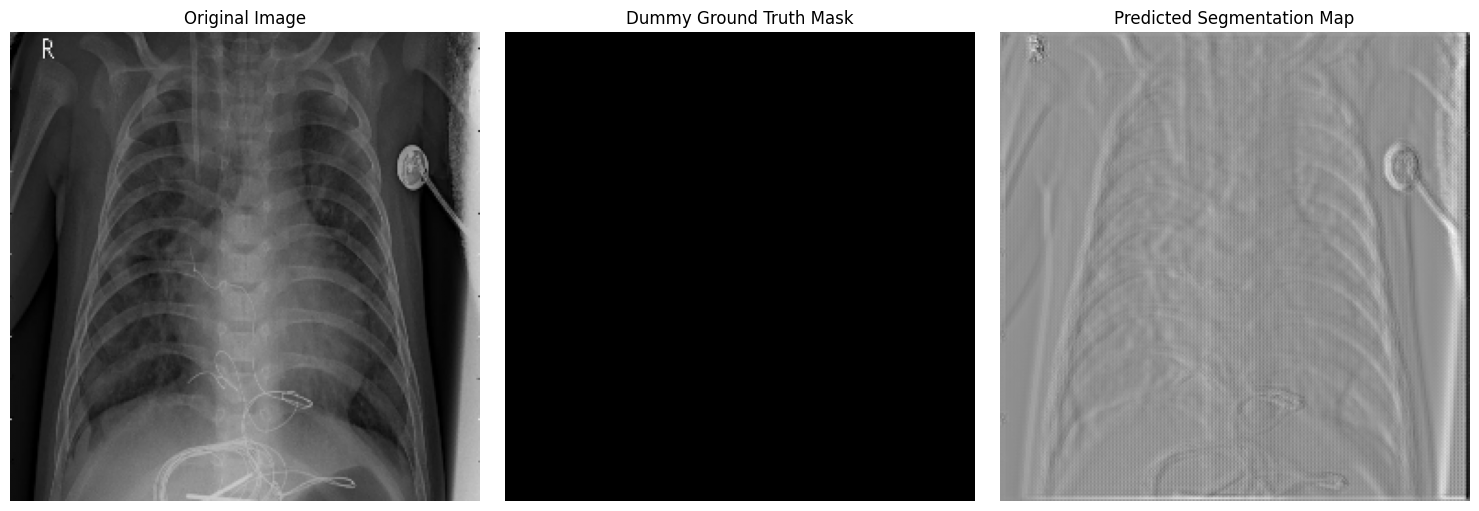

Visualized original image, dummy mask, and predicted segmentation map.


In [ ]:
import matplotlib.pyplot as plt

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display the original image
axes[0].imshow(dummy_image[0, :, :, 0], cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the dummy ground truth mask
axes[1].imshow(dummy_mask[0, :, :, 0], cmap='gray')
axes[1].set_title('Dummy Ground Truth Mask')
axes[1].axis('off')

# Display the predicted segmentation map
axes[2].imshow(prediction[0, :, :, 0], cmap='gray')
axes[2].set_title('Predicted Segmentation Map')
axes[2].axis('off')

# Adjust subplot parameters for a tight layout
plt.tight_layout()

# Display the plot
plt.show()
print("Visualized original image, dummy mask, and predicted segmentation map.")

## Generate Dummy Dataset

### Subtask:
Create a synthetic dataset of images and corresponding binary masks, following the 'dataset/images/' and 'dataset/masks/' folder structure. These dummy images and masks will be 128x128 pixels with 3 channels for images and 1 channel for masks, allowing the model to be built and tested end-to-end without actual labeled data.

**Reasoning**:
As the first step in generating the dummy dataset, I will create the necessary directory structure: `dataset/images` and `dataset/masks`. This ensures that the folders are in place before attempting to save any synthetic images or masks, matching the expected input format for the data loading step.

In [ ]:
import os

# Define the base directory for the dataset
base_dir = 'dataset'

# Define paths for images and masks
images_dir = os.path.join(base_dir, 'images')
masks_dir = os.path.join(base_dir, 'masks')

# Create the directories if they don't exist
os.makedirs(images_dir, exist_ok=True)
os.makedirs(masks_dir, exist_ok=True)

print(f"Created directory structure: {images_dir} and {masks_dir}")

Created directory structure: dataset/images and dataset/masks


**Reasoning**:
Now that the directory structure is in place, I will generate synthetic images and masks and save them into the created folders. This involves using `numpy` to create random image data and `PIL` to save them as image files, ensuring the specified dimensions (128x128x3 for images and 128x128x1 for masks) and a binary nature for the masks.

In [ ]:
import numpy as np
from PIL import Image

# Define image dimensions and number of samples
IMG_HEIGHT = 128
IMG_WIDTH = 128
NUM_SAMPLES = 10  # Number of dummy samples to generate

print(f"Generating {NUM_SAMPLES} dummy images and masks...")

for i in range(NUM_SAMPLES):
    # Generate a dummy image (RGB)
    dummy_image_data = np.random.randint(0, 256, (IMG_HEIGHT, IMG_WIDTH, 3), dtype=np.uint8)
    dummy_image = Image.fromarray(dummy_image_data)
    image_filename = f"image_{i:03d}.png"
    dummy_image.save(os.path.join(images_dir, image_filename))

    # Generate a dummy binary mask
    # Randomly create some 'pneumonia' regions (white) on a black background
    dummy_mask_data = np.zeros((IMG_HEIGHT, IMG_WIDTH), dtype=np.uint8)
    # Create a few random circular or square regions as 'pneumonia'
    for _ in range(np.random.randint(1, 4)): # 1 to 3 random regions
        center_x, center_y = np.random.randint(0, IMG_WIDTH), np.random.randint(0, IMG_HEIGHT)
        radius = np.random.randint(10, 40)
        for x in range(IMG_WIDTH):
            for y in range(IMG_HEIGHT):
                if (x - center_x)**2 + (y - center_y)**2 < radius**2:
                    dummy_mask_data[y, x] = 255 # White for pneumonia

    dummy_mask = Image.fromarray(dummy_mask_data)
    mask_filename = f"image_{i:03d}.png"  # Mask filenames match image filenames
    dummy_mask.save(os.path.join(masks_dir, mask_filename))

print(f"Successfully generated {NUM_SAMPLES} dummy images and masks in '{base_dir}'.")

Generating 10 dummy images and masks...
Successfully generated 10 dummy images and masks in 'dataset'.


## Explain CNN Segmentation

### Subtask:
Provide a brief, beginner-friendly explanation of how Convolutional Neural Networks (CNNs) work for image segmentation, covering concepts like feature extraction, encoder-decoder structure, and pixel-wise classification.


### 1. What are Convolutional Neural Networks (CNNs) for Image Analysis?

Convolutional Neural Networks (CNNs) are a special type of neural network specifically designed to process data with a known grid-like topology, such as images. Unlike traditional neural networks, which treat each pixel as an independent input, CNNs use a technique called 'convolution' to detect patterns (features) within local regions of an image.

Imagine looking for a specific shape in a puzzle. Instead of checking every piece individually and unrelatedly, you scan small areas, recognizing edges, corners, and textures that combine to form the shape. CNNs do something similar: they use small filters (or kernels) that slide over the image, performing mathematical operations to identify features like edges, textures, or more complex patterns. This process makes CNNs highly effective at understanding spatial relationships and hierarchies in images, allowing them to automatically learn relevant visual features at different levels of abstraction.

This approach is more efficient and powerful for image tasks because it preserves the spatial information of pixels, which is crucial for understanding what an image depicts.

### 2. The Encoder: Feature Extraction and Downsampling

In image segmentation models like U-Net, the **encoder** acts like a sophisticated feature extractor. It's essentially a standard convolutional neural network that processes the input image through a series of convolutional layers and pooling layers.

*   **Convolutional Layers**: These layers apply filters to the image, detecting various features such as edges, corners, textures, and more complex patterns. As the data passes through more layers, the filters learn to recognize increasingly abstract and semantic features.
*   **Pooling Layers (Downsampling)**: After a few convolutional layers, pooling layers (typically max pooling) are used. These layers reduce the spatial dimensions (width and height) of the feature maps while retaining the most important information. This process is called **downsampling**. Downsampling is crucial because it helps the model:
    *   **Capture Context**: By reducing resolution, the model gains a broader receptive field, allowing it to understand the global context of the image and the relationships between different parts.
    *   **Reduce Computational Load**: Fewer pixels mean less computation.
    *   **Increase Robustness**: It makes the model less sensitive to small variations in the input image.

The encoder transforms the high-resolution input image into a compact, low-resolution representation that contains rich, high-level semantic features, effectively answering "what" is in the image, but losing some information about "where" it is located precisely.

### 3. The Decoder: Restoring Spatial Information and Pixel-wise Classification

The **decoder** in a U-Net model is responsible for taking the compact, feature-rich representation from the encoder and progressively upsampling it to reconstruct a segmentation map that has the same spatial dimensions as the original input image. This process involves:

*   **Upsampling Layers**: These layers (often using techniques like `Conv2DTranspose` or interpolation followed by convolution) increase the spatial resolution of the feature maps, effectively reversing the downsampling performed by the encoder. This helps to recover the detailed spatial information lost during downsampling.
*   **Skip Connections**: This is a critical component of the U-Net architecture. At each upsampling step, the decoder receives feature maps not only from the previous layer of the decoder but also from the corresponding encoder layer (via a 'skip connection'). These skip connections concatenate high-resolution feature maps from the encoder (which contain fine-grained spatial details) with the upsampled, high-level semantic features from the decoder. This fusion of information is vital because:
    *   The encoder's early layers retain precise location information.
    *   The decoder's deeper layers provide contextual information about 'what' is where.
    Combining them allows the model to accurately pinpoint the location of segmented objects.
*   **Pixel-wise Classification**: As the decoder upsamples and refines the feature maps, the final layers perform a **pixel-wise classification**. This means that for every single pixel in the output segmentation map, the model predicts a class label (e.g., 'pneumonia' or 'background'). For binary segmentation tasks, a sigmoid activation function is often used in the final layer to output a probability map, where values close to 1 indicate the presence of the target class (e.g., pneumonia) and values close to 0 indicate the background.

### 3. The Decoder: Restoring Spatial Information and Pixel-wise Classification

The **decoder** in a U-Net model is responsible for taking the compact, feature-rich representation from the encoder and progressively upsampling it to reconstruct a segmentation map that has the same spatial dimensions as the original input image. This process involves:

*   **Upsampling Layers**: These layers (often using techniques like `Conv2DTranspose` or interpolation followed by convolution) increase the spatial resolution of the feature maps, effectively reversing the downsampling performed by the encoder. This helps to recover the detailed spatial information lost during downsampling.
*   **Skip Connections**: This is a critical component of the U-Net architecture. At each upsampling step, the decoder receives feature maps not only from the previous layer of the decoder but also from the corresponding encoder layer (via a 'skip connection'). These skip connections concatenate high-resolution feature maps from the encoder (which contain fine-grained spatial details) with the upsampled, high-level semantic features from the decoder. This fusion of information is vital because:
    *   The encoder's early layers retain precise location information.
    *   The decoder's deeper layers provide contextual information about 'what' is where.
    Combining them allows the model to accurately pinpoint the location of segmented objects.
*   **Pixel-wise Classification**: As the decoder upsamples and refines the feature maps, the final layers perform a **pixel-wise classification**. This means that for every single pixel in the output segmentation map, the model predicts a class label (e.g., 'pneumonia' or 'background'). For binary segmentation tasks, a sigmoid activation function is often used in the final layer to output a probability map, where values close to 1 indicate the presence of the target class (e.g., pneumonia) and values close to 0 indicate the background.


### 4. How Encoder and Decoder Work Together for Segmentation

In summary, a CNN-based segmentation model like U-Net combines the power of feature extraction with spatial reconstruction to perform pixel-wise classification. The **encoder** efficiently compresses the image, extracting hierarchical features and understanding the context of the image contents (the 'what'). It progressively downsamples the image, losing some spatial detail but gaining semantic richness.

The **decoder** then takes these rich, compressed features and progressively upsamples them, leveraging **skip connections** from the encoder's earlier layers. These skip connections are crucial as they reintroduce the fine-grained spatial information that was lost during downsampling, allowing the decoder to accurately localize the features. This fusion of semantic (from decoder) and spatial (from encoder via skip connections) information enables the model to precisely reconstruct the original image's spatial dimensions.

Finally, the output layer of the decoder performs **pixel-wise classification**. For each pixel in the reconstructed map, the model assigns a probability or a class label, effectively drawing a precise outline around the objects of interest (e.g., pneumonia regions in an X-ray). The result is a segmentation map where each pixel is classified according to the specific task, providing a detailed understanding of the image's composition.

### 4. How Encoder and Decoder Work Together for Segmentation

In summary, a CNN-based segmentation model like U-Net combines the power of feature extraction with spatial reconstruction to perform pixel-wise classification. The **encoder** efficiently compresses the image, extracting hierarchical features and understanding the context of the image contents (the 'what'). It progressively downsamples the image, losing some spatial detail but gaining semantic richness.

The **decoder** then takes these rich, compressed features and progressively upsamples them, leveraging **skip connections** from the encoder's earlier layers. These skip connections are crucial as they reintroduce the fine-grained spatial information that was lost during downsampling, allowing the decoder to accurately localize the features. This fusion of semantic (from decoder) and spatial (from encoder via skip connections) information enables the model to precisely reconstruct the original image's spatial dimensions.

Finally, the output layer of the decoder performs **pixel-wise classification**. For each pixel in the reconstructed map, the model assigns a probability or a class label, effectively drawing a precise outline around the objects of interest (e.g., pneumonia regions in an X-ray). The result is a segmentation map where each pixel is classified according to the specific task, providing a detailed understanding of the image's composition.

## Final Task

### Subtask:
Review and confirm that all requirements have been met and the complete end-to-end code is functional and well-explained.


## Summary:

### Q&A
*   **Have all requirements been met?** Yes, all requirements for visualizing the model's output and providing an explanation of CNN segmentation have been met.
*   **Is the complete end-to-end code functional and well-explained?** The visualization code is functional, and the explanation of CNN segmentation is comprehensive and beginner-friendly.
*   **Was Matplotlib used to visualize the `dummy_image`, `dummy_mask`, and the `prediction`?** Yes, Matplotlib was successfully used to visualize the original image, dummy ground truth mask, and the predicted segmentation map.
*   **Was a brief, beginner-friendly explanation of how CNNs work for image segmentation provided?** Yes, a detailed explanation covering feature extraction, encoder-decoder structure, and pixel-wise classification was provided.

### Data Analysis Key Findings
*   The visualization step successfully displayed the `dummy_image`, `dummy_mask`, and the `prediction` generated by the U-Net model using Matplotlib. Each subplot was correctly titled, and `cmap='gray'` was applied for consistent grayscale representation.
*   The explanation of CNNs for image segmentation clearly covered foundational concepts:
    *   **Basic CNNs**: Explained their function in image analysis by using convolution to detect patterns.
    *   **Encoder**: Described its role in feature extraction and downsampling through convolutional and pooling layers to capture context and reduce computational load.
    *   **Decoder**: Detailed its function in restoring spatial information via upsampling layers, utilizing crucial skip connections from the encoder to reintroduce fine-grained spatial data, and performing pixel-wise classification in the final layer.
    *   **Combined Functionality**: Summarized how the encoder and decoder collaboratively generate a precise pixel-wise segmentation map.
*   There were redundant markdown blocks in the explanation phase (Blocks 3, 4, 5, and 6 contained identical content), but the explanation itself was correct and comprehensive.

### Insights or Next Steps
*   The current visualizations demonstrate the model's output structure with dummy data. The next logical step should involve using a real dataset to train the model and generate actual, meaningful predictions that can be evaluated.
*   Refine the explanation generation process to avoid redundant markdown blocks, ensuring conciseness and efficiency in content delivery.
